In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [18]:
titanic = pd.read_csv("train.csv")
display(titanic.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Label Encoding

#### 1) Sex değişkenini Mean encoding yaparak encode ediniz. Her kategori için Survived değişkeninin ortalamasını kategori adı ile değiştirebilirsiniz. 

##### IPUCU: pandas groupby ve map fonksiyonlarını kullanabilirsiniz.

In [67]:
titanic1 = titanic.copy()

means = titanic1.Survived.groupby(titanic1.Sex).mean()
titanic1["Sex_encoded"] = titanic1.Sex.map(means)
titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.188908
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.742038
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.742038
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.742038
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.188908


#### 2) Bindikleri Yer (Embarked) değişkenini sklearn OneHotEncoder objesini kullanarak encode edin.

In [19]:
from sklearn.preprocessing import OneHotEncoder
oneHot = OneHotEncoder(sparse = False)

# dataset'in kopyasını alıyorum orjinali bozmamak için
titanic2 = titanic.copy()

# fakat embarked değişkeninde nan valuelar var, öncelikle bunları doldurmalıyız.
# kategorik değişkenler olduğu için mode değeri ile doldurma yapacağım
titanic2.Embarked.fillna(titanic2["Embarked"].mode()[0], inplace=True)

# ve doldu mu diye kontrol edelim
titanic2.Embarked.isnull().sum()

0

In [20]:
# şimdi OneHotEncode'a devam edelim
encoded_feat = oneHot.fit_transform(titanic2[["Embarked"]]).astype(np.uint8)
encoded_feat # bu bir numpy array'i

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [44]:
# şimdi bu numpy array'ini dataframe2e çevirmeliyiz. Col isimleri ve indexlerini kaybetmeden
embarkedCols =oneHot.categories_[0].tolist()
pd.DataFrame(encoded_feat, index = titanic2.index, columns = embarkedCols)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


#### 3) Cabin değişkenini sklearn LabelEncoder veya OrdinalEncoder objesini kullanarak encode edin.

In [55]:
# Değerlerine baktığımızda çok fazla feature var bu sebeple ordinal yapmak uzun sürer.
titanic2.Cabin.unique()

array(['B96 B98', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [48]:
# Bu yüzden LabelEncoder ile yapalım
# fakat başlamadan önce yine mode ile nan değerleri dolduralım

titanic2.Cabin.isnull().sum()

687

In [49]:
titanic2.Cabin.fillna(titanic2.Cabin.mode()[0], inplace = True)
titanic2.Cabin.isnull().sum()

# hiç nan değer kalmadığını görmüş olduk

0

In [51]:
# şimdi labelencode işlemini yapalım
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
titanic2["Encoded_Cabin"] = labelEncoder.fit_transform(titanic2.Cabin)
titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Encoded_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,47
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,81
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,47
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,55
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,47


# Outlier Handling

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _1.SORU _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

#### 1)Fare değişkeni için boxplot çizdiriniz.

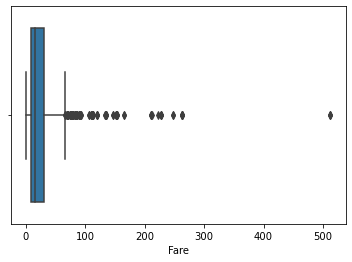

In [152]:
import matplotlib.pyplot as plt

titanic3 = titanic.copy()

sns.boxplot(titanic3.Fare)
plt.show()

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _2.SORU _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

#### 2)Fare değişkeninedeki outlier değerleri Z-Score kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız. 

In [77]:
# fare değişkeni için outlier değerleri belirledik

z_score_fare = (titanic3.Fare - titanic3.Fare.mean()) / titanic3.Fare.std()
z_score_fare.head()

0   -0.502163
1    0.786404
2   -0.488580
3    0.420494
4   -0.486064
Name: Fare, dtype: float64

In [83]:
# belirli aralığın dışında kaç tane outlier fare değişkeni olduğunu bulduk
(z_score_fare>3).sum(),(z_score_fare<-3).sum()

(20, 0)

In [90]:
# aynı sonucu bu şekilde de alabiliriz.
outlier_mask = ((z_score_fare > 3) | (z_score_fare < -3))
len(titanic3[outlier_mask])


20

In [104]:
# sınır değerlere bakalım
titanic3[~outlier_mask]["Fare"].max(), titanic3[~outlier_mask]["Fare"].min()

(164.8667, 0.0)

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _3.SORU _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

#### 3)Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [106]:
# upper ve lower değerleri değişkene atadık
# sınır değerleri iki farklı şekilde almak istedim antrenman olması açısından

upper_replace = titanic3[~outlier_mask]["Fare"].max()
lower_replace = titanic3[z_score_fare >= -3]["Fare"].min()
upper_replace,lower_replace


(164.8667, 0.0)

In [149]:
titanic4 = titanic.copy()
titanic4["Fare"][z_score_fare > 3] = upper_replace
titanic4["Fare"][z_score_fare < -3] = lower_replace


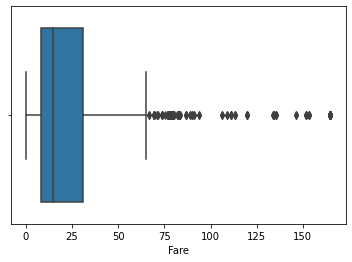

In [153]:
sns.boxplot(titanic4.Fare)
plt.show()

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _4.SORU _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

#### 4) Fare değişkeninedeki outlier değerleri IQR metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [174]:
# manuel yol ile IQR hesaplayalım


q1 = titanic.Fare.quantile(q = 0.25)
q3 = titanic.Fare.quantile(q = 0.75)

iqr = q3 - q1

upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
outlier_mask = ((titanic["Fare"] > upper) | (titanic["Fare"] < lower))
    
    
print(len(titanic[outlier_mask])," tane outlier değer bulunuyor")
print("Fare değişkeninin sınır değerleri:(",titanic[outlier_mask]["Fare"].max(),",",titanic[outlier_mask]["Fare"].min(),")")



116  tane outlier değer bulunuyor
Fare değişkeninin sınır değerleri:( 512.3292 , 66.6 )


# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _5.SORU _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

#### 5) Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [150]:
# datanın kopyasını alalım ve sonra
# sınır değerleri belirleyelim
titanic_iqr = titanic.copy()

upper_limit = titanic[~outlier_mask]["Fare"].max()
lower_limit = titanic[~outlier_mask]["Fare"].min()

titanic_iqr["Fare"][titanic_iqr.Fare > upper_limit] = upper_limit
titanic_iqr["Fare"][titanic_iqr.Fare < lower_limit] = lower_limit

<AxesSubplot:xlabel='Fare'>

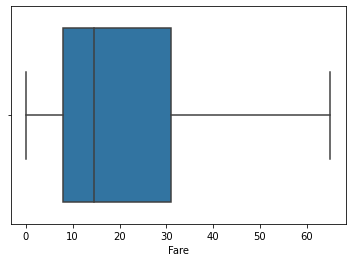

In [151]:
# böylece outlier değerlerden kurtulmuş olduk
sns.boxplot(titanic_iqr.Fare)

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _6.SORU _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

#### 6) Fare değişkeninedeki outlier değerleri Hard-Edges metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [155]:
# df'nin kopyasını alıp alt üst limitleri belirleyelim.
titanic_new = titanic.copy()
upper_limit = titanic_new.Fare.quantile(q=0.99)
lower_limit = titanic_new.Fare.quantile(q=0.01)

print("Üst limit :", upper_limit)
print("Alt limit :", lower_limit)

Üst limit : 249.00622000000033
Alt limit : 0.0


In [158]:
# şimdi bu limitlerin dışında kaç tane değer var bakalım.

outlier_detect = ((titanic_new.Fare > upper_limit) | (titanic_new.Fare < lower_limit))
print("Hard Edge metodu ile tespit edilen outlier değer sayısı : ",len(titanic_new[outlier_detect]))

Hard Edge metodu ile tespit edilen outlier değer sayısı :  9


<AxesSubplot:xlabel='Fare'>

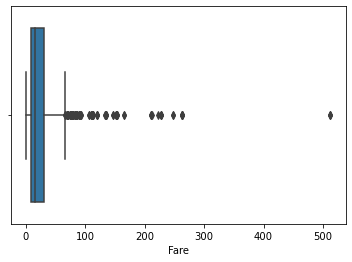

In [162]:
sns.boxplot(titanic_new.Fare)

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _7.SORU _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

#### 7) Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

not : burda bir hata mı oldu anlamadım, boxplot neden böyle çıktı?

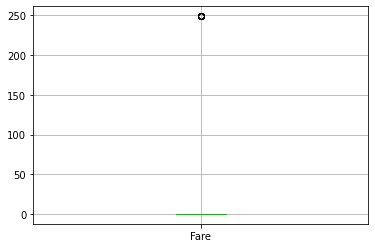

In [169]:
titanic_new["Fare"][titanic_new.Fare > upper_limit] = upper_limit
titanic_new["Fare"][titanic_new.Fare < upper_limit] = lower_limit

titanic_new[["Fare"]].boxplot()
plt.show()

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _8.SORU _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

#### 8) Fare değişkeni için yukarıdaki 3 metodu kullanarak sınır değerler olarak bulduğunuz değerleri ve outlier sayılarını karşılaştırın. Bu değişken için hangisini kullanmak daha mantıklı olabilir?

In [170]:
# Hard Edges filtresini hazırlayalım
titanic_final = titanic.copy()

upper_hard = titanic_final["Fare"].quantile(q = 0.99)
lower_hard = titanic_final["Fare"].quantile(q = 0.01)

hardEdge_mask = ((titanic_final["Fare"] > upper_hard) | (titanic_final["Fare"] < lower_hard))

In [171]:
# Z score filtresini hazırlayalım
z_score = (titanic_final["Fare"] - titanic_final["Fare"].mean()) - titanic_final["Fare"].std()

z_score_mask = ((z_score > 3) | (z_score < -3))

In [173]:
# IQR filtresini hazırlayalım
q1 = titanic_final.Fare.quantile(q=0.25)
q3 = titanic_final.Fare.quantile(q=0.75)
IQR = q3 - q1

upper_iqr = q3 + 1.5*IQR
lower_iqr = q1 - 1.5*IQR

iqr_mask = ((titanic_final.Fare > upper_iqr) | (titanic_final.Fare < lower_iqr)) 

In [179]:
# Sınır değerlere bakalım

print("Hard Edge ile bulunan sınır değerler : ",titanic_final["Fare"][hardEdge_mask].max(),"-", titanic_final["Fare"][hardEdge_mask].min())
print("Z Score ile bulunan sınır değerler : ",titanic_final["Fare"][z_score_mask].max(),"-", titanic_final["Fare"][z_score_mask].min())
print("IQR ile bulunan sınır değerler : ",titanic_final["Fare"][iqr_mask].max(),"-", titanic_final["Fare"][iqr_mask].min())

Hard Edge ile bulunan sınır değerler :  512.3292 - 262.375
Z Score ile bulunan sınır değerler :  512.3292 - 0.0
IQR ile bulunan sınır değerler :  512.3292 - 66.6


In [181]:
print("Hard Edge ile bulunan toplam outlier : ",len(titanic_final["Fare"][hardEdge_mask]))
print("Z Score ile bulunan toplam outlier : ",len(titanic_final["Fare"][z_score_mask]))
print("IQR ile bulunan toplam outlier : ",len(titanic_final["Fare"][iqr_mask]))

Hard Edge ile bulunan toplam outlier :  9
Z Score ile bulunan toplam outlier :  874
IQR ile bulunan toplam outlier :  116


Bu değişken için bence kullanılması en mantıklı yöntem IQR yöntemi. Z-score ile çok fazla veriden mahrum kalacağız ve Hard Edge ile de çok az gürültüden kurtulmuş olacağız. En tutarlısı IQR bu yüzden.